In [2]:
import pandas as pd

In [53]:
df= pd.DataFrame(data={"movieId":[1,2,3,4,5],
"title":["Toy Story (1995)","Jumanji (1995)","Grumpier Old Men (1995)","Waiting to Exhale (1995)","Father of the Bride Part II (1995)"] ,
"genres":["Adventure|Animation|Children|Comedy|Fantasy","Adventure|Children|Fantasy","Comedy|Romance","Comedy|Drama|Romance","Comedy"]})


In [54]:
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [55]:
pattern = '\((\d{4})\)'
df['year'] = df.title.str.extract(pattern, expand=False) #False returns a series
df['title'] = df.title.str.replace('(\(\d\d\d\d\))', '')
df['genres'] = df.genres.str.split('|') #convert to list
# df['genres'] = df.genres.str.replace('|', ',')

C:\Users\afraa.75\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
df.head()

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995


In [62]:
#Copying the movie dataframe into a new one since we won't need to use the genre information in our first case.
moviesWithGenres_df = df.copy()

#For every row in the dataframe, iterate through the list of genres and place a 1 into the corresponding column
for index, row in df.iterrows():
    for genre in row['genres']:
        moviesWithGenres_df.at[index, genre] = 1 # مثلا اول اندكس صفر والجينر ادفينشر حطا واحد
        #(at) work the same as (loc)
      


In [63]:
#Filling in the NaN values with 0 to show that a movie doesn't have that column's genre
moviesWithGenres_df = moviesWithGenres_df.fillna(0)
moviesWithGenres_df.head()

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,0.0,0.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,1.0
4,5,Father of the Bride Part II,[Comedy],1995,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import wordnet, stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')

In [8]:
df= pd.read_csv("movies.csv")

In [9]:
df.drop('id',axis = 1, inplace =True)
df.head()


,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,Dragon Ball Super: Super Hero,Animation-Science Fiction-Action,ja,The Red Ribbon Army an evil organization that ...,8934.503,Shueisha-Fuji Television Network-Toei Animatio...,2022-06-11,0.0,45000000.0,99.0,Released,A super awakening and calamity is born.,7.549,133.0,Masako Nozawa-Toshio Furukawa-Yuko Minaguchi-H...,android-sequel-attack-based on manga-fighting-...,/rugyJdeoJm7cSJL1q4jBpTNbxyU.jpg,/ugS5FVfCI3RV0ZwZtBV3HAV75OX.jpg,629015-507086-361743-438148-778855-810693-8119...
1,Prey,Action-Science Fiction-Horror,en,When danger threatens her camp the fierce and ...,7870.600,Lawrence Gordon Productions-Davis Entertainmen...,2022-08-02,0.0,0.0,100.0,Released,They hunt to live. It lives to hunt.,8.064,2959.0,Amber Midthunder-Dane DiLiegro-Stormee Kipp-Mi...,hunter-alien life-form-prequel-alien-native am...,/ujr5pztc1oitbe7ViMUOilFaJ7s.jpg,/7ZO9yoEU2fAHKhmJWfAc2QIPWJg.jpg,759175-838330-567608-725201-667739-169-762504-...
2,Thor: Love and Thunder,Action-Adventure-Fantasy,en,After his retirement is interrupted by Gorr th...,6472.862,Marvel Studios-Kevin Feige Productions,2022-07-06,250000000.0,720000000.0,119.0,Released,The one is not the only.,6.782,1986.0,Chris Hemsworth-Christian Bale-Tessa Thompson-...,ex-girlfriend-hero-greek mythology-sequel-supe...,/pIkRyD18kl4FhoCNQuWxWu5cBLM.jpg,/p1F51Lvj3sMopG948F5HsBbl43C.jpg,2-438148-45920-507086-361743-919355-748918-718...
3,Jurassic World Dominion,Adventure-Action-Science Fiction,en,Four years after Isla Nublar was destroyed din...,4142.526,Universal Pictures-Amblin Entertainment,2022-06-01,165000000.0,974000000.0,147.0,Released,The epic conclusion of the Jurassic era.,7.096,2957.0,Chris Pratt-Bryce Dallas Howard-Laura Dern-Jef...,giant monster-dinosaur-child kidnapping-jurass...,/kAVRgw7GgK1CfYEJq8ME6EvRIgU.jpg,/jauI01vUIkPA0xVsamGj0Gs1nNL.jpg,438148-629015-361743-616037-610150-718789-7788...
4,Minions: The Rise of Gru,Animation-Adventure-Comedy-Fantasy,en,A fanboy of a supervillain supergroup known as...,3673.683,Universal Pictures-Illumination Entertainment,2022-06-29,85000000.0,833623000.0,87.0,Released,A villain will rise.,7.761,1544.0,Steve Carell-Pierre Coffin-Russell Brand-Alan ...,duringcreditsstinger-shared universe,/wKiOkZTN9lUUUNZLmtnwubZYONg.jpg,/nmGWzTLMXy9x7mKd8NKPLmHtWGa.jpg,924482-616037-507086-555876-361743-698128-6290...


In [10]:
def lammitization():

    df['overview']= df['overview'].fillna('0')

    # Tokenizing the tweet base texts.
    # Applying part of speech tags.
    df['overview']=df['overview'].str.lower().apply(word_tokenize).apply(nltk.tag.pos_tag) 


    # Converting part of speeches to wordnet format.

    def get_wordnet_pos(tag):
        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('N'):
            return wordnet.NOUN
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN


    df['overview']= df['overview'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
    
    # Applying word lemmatizer.

    wnl = WordNetLemmatizer()

    df['overview']= df['overview'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
    

    df['overview']= df['overview'].apply(lambda x: ' '.join(x))


In [11]:
df.drop_duplicates(inplace=True, ignore_index=True)
df.fillna(value={i: "0" for i in ['overview', 'genres', 'keywords', 'credits']}, inplace=True)

df.overview = df.overview + df.keywords.apply(lambda x: ' '.join(x.split('-'))) + df.genres.apply(lambda x: ' '.join(x.split('-'))) + df.credits.apply(lambda x: ' '.join(x.replace(' ', '').split('-')[:3]))
# print("Aaa",df.overview)



In [13]:
tfidf = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf.fit_transform(df['overview'])

display(pd.DataFrame(
    tfidf_matrix[:10, 7000:7070].toarray(),
    columns= tfidf.get_feature_names()[7000:7070],
    index = df.title[:10]).round())

# print(tfidf_matrix.shape)  

,000matiseri,000matsu,000matsuyaonoe,000matt,000mattdelaprada,000matteobranciamore,000matteocarlomagno,000matteoschiavone,000matteospinola,000matthewbellamy,...,000maxdearly,000maxderieux,000maxdhartigny,000maxfigman,000maxhegewald,000maxherbrechter,000maxhernandezjr,000maximecormier,000maximedesjardins,000maximekerzanet
title,,,,,,,,,,,,,,,,,,,,,
Dragon Ball Super: Super Hero,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Prey,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Thor: Love and Thunder,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jurassic World Dominion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Minions: The Rise of Gru,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Top Gun: Maverick,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Day Shift,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Black Phone,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Eighth Clause,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
def get_recommendations(title):
    # Get the index of the movie that matches the title
    idx = df.index[df['title'] == title][0]
    # show given movie poster
    try:
        a = io.imread(f'https://image.tmdb.org/t/p/w500/{df.loc[idx, "poster_path"]}')
        plt.imshow(a)
        plt.axis('off')
        plt.title(title)
        plt.show()
    except:pass
    
    print('Recommendations\n')

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_similarity(tfidf_matrix, tfidf_matrix[idx])))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:10]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    result = df.iloc[movie_indices]
    
    # show reco. movie posters
    fig, ax = plt.subplots(3, 3, figsize=(15,20))
    ax=ax.flatten()
    for i, j in enumerate(result.poster_path):
        try:
            ax[i].axis('off')
            ax[i].set_title(result.iloc[i].title,fontsize=22)
            a = io.imread(f'https://image.tmdb.org/t/p/w500/{j}')
            ax[i].imshow(a)
        except: pass
    fig.tight_layout()
    fig.show()

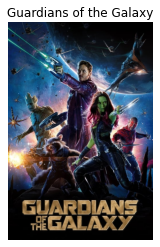

Recommendations



C:\Users\afraa.75\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


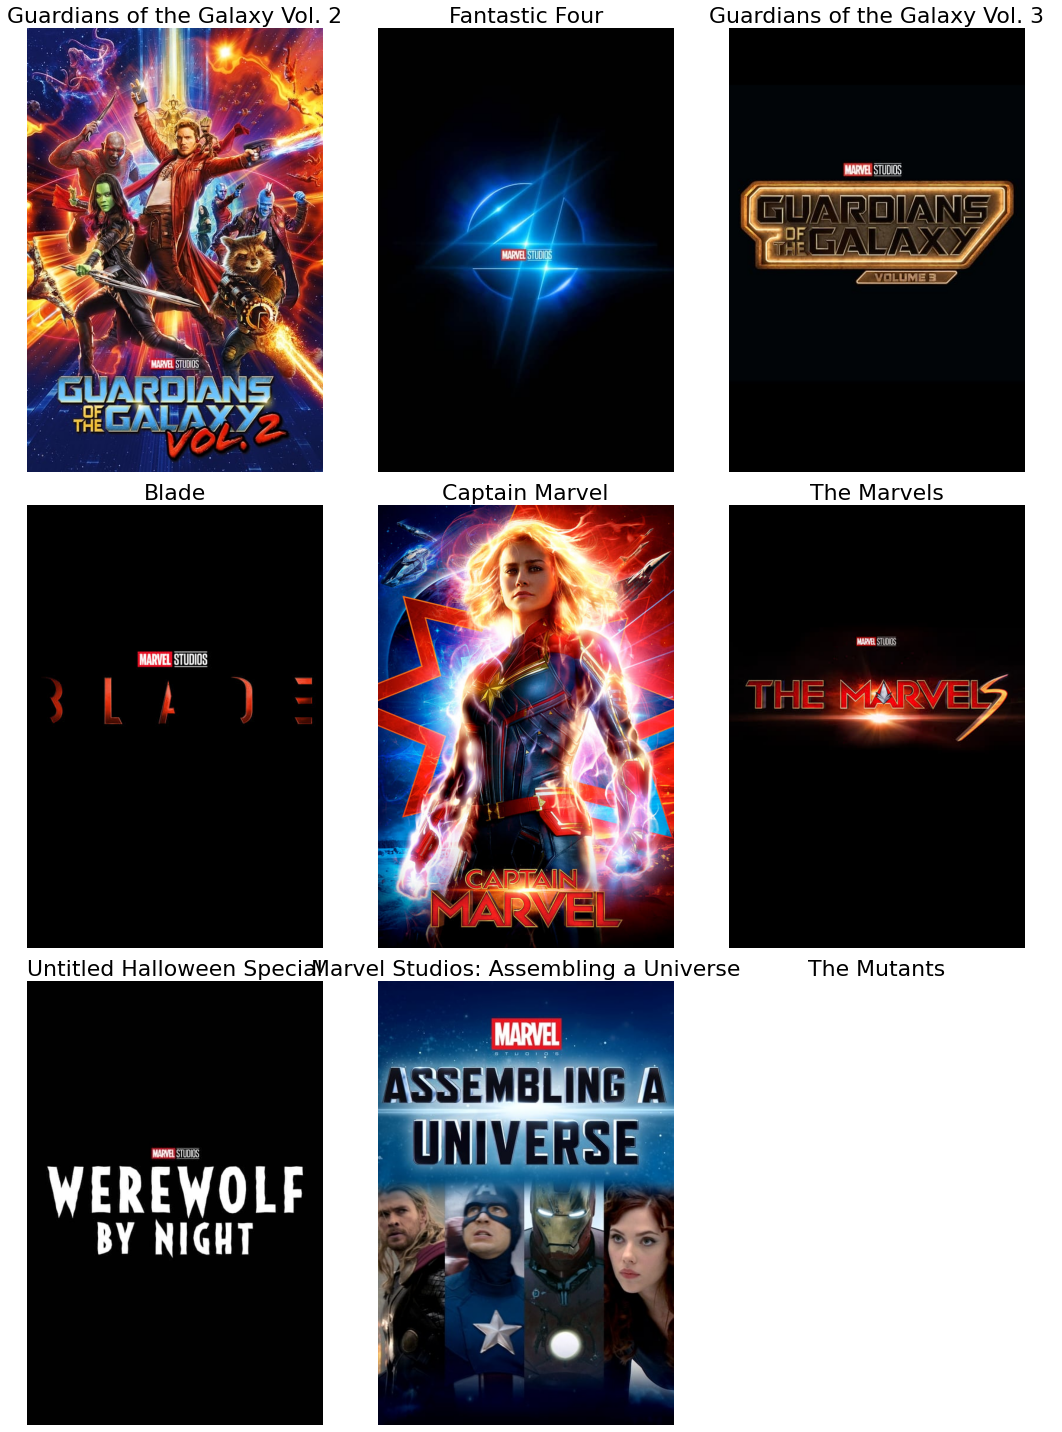

In [15]:
get_recommendations("Guardians of the Galaxy")